In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
ds = xr.open_dataset('/nfs/see-fs-01_users/eeymr/dump2hold/xosfb/pg/xosfbo#pg000005405c1+.nc')
ds

<xarray.Dataset>
Dimensions:             (depth: 19, depth_1: 20, latitude: 144, latitude_1: 143, longitude: 288, longitude_1: 288, t: 1, unspecified: 1)
Coordinates:
  * longitude           (longitude) float32 0.0 1.25 2.5 ... 356.25 357.5 358.75
  * latitude            (latitude) float32 -89.375 -88.125 ... 88.125 89.375
  * depth               (depth) float32 10.0 20.0 30.0 ... 3654.3 4269.5 4884.8
  * t                   (t) object 5405-06-01 00:00:00
  * unspecified         (unspecified) float32 -1.0
  * depth_1             (depth_1) float32 5.0 15.0 25.0 ... 4577.15 5192.45
  * longitude_1         (longitude_1) float32 0.625 1.875 ... 358.125 359.375
  * latitude_1          (latitude_1) float32 -88.75 -87.5 -86.25 ... 87.5 88.75
Data variables:
    W_ym_dpth           (t, depth, latitude, longitude) float32 ...
    srfSalFlux_ym_uo    (t, unspecified, latitude, longitude) float32 ...
    insitu_T_ym_dpth    (t, depth_1, latitude, longitude) float32 ...
    ucurrTot_ym_dpth    (t, depth_1, latitude_1, longitude_1) float32 ...
    vcurrTot_ym_dpth    (t, depth_1, latitude_1, longitude_1) float32 ...
    srfSalFlux_ym_uo_1  (t, unspecified, latitude, longitude) float32 ...
    temp_ym_dpth        (t, depth_1, latitude, longitude) float32 ...
    salinity_ym_dpth    (t, depth_1, latitude, longitude) float32 ...
    otracer14_ym_dpth   (t, depth_1, latitude, longitude) float32 ...
    streamFn_ym_uo      (t, unspecified, latitude, longitude) float32 ...
    mixLyrDpth_ym_uo    (t, unspecified, latitude, longitude) float32 ...
    iceconc_ym_uo       (t, unspecified, latitude, longitude) float32 ...
    icedepth_ym_uo      (t, unspecified, latitude, longitude) float32 ...
    PLE_ym_uo           (t, unspecified, latitude, longitude) float32 ...
    outflow_ym_uo       (t, unspecified, latitude, longitude) float32 ...
    anomSaltFlux_ym_uo  (t, unspecified, latitude, longitude) float32 ...
Attributes:
    history:  Sun Apr 12 04:50:34 BST 2020 - XCONV V1.91 Development

In [24]:
ice = ds.iceconc_ym_uo.isel(t=0).isel(unspecified=0)
lon = ice.longitude.values
lat = ice.latitude.values
ice

<xarray.DataArray 'iceconc_ym_uo' (latitude: 144, longitude: 288)>
array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.981454, 0.980857, 0.980947, ..., 0.982311, 0.982648, 0.981301],
       [0.980655, 0.979642, 0.979759, ..., 0.983059, 0.983133, 0.981289],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]],
      dtype=float32)
Coordinates:
  * longitude    (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * latitude     (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
    t            object 5405-06-01 00:00:00
    unspecified  float32 -1.0
Attributes:
    source:         Unified Model Output (Vn 4.6):
    name:           iceconc_ym_uo
    title:          AICE : ICE CONCENTRATION
    date:           01/12/51
    time:           00:00
    long_name:      AICE : ICE CONCENTRATION
    standard_name:  sea_ice_area_fraction
    pp_name:        OCtr/ Fractional ice cover.
    pcmdi_name:     sic
    stash_code:     146
    submodel:       2
    processing:     yearly_mean_unspecified_vertical_coord_(ocean)
    units:           
    valid_min:      0.0
    valid_max:      0.99480647

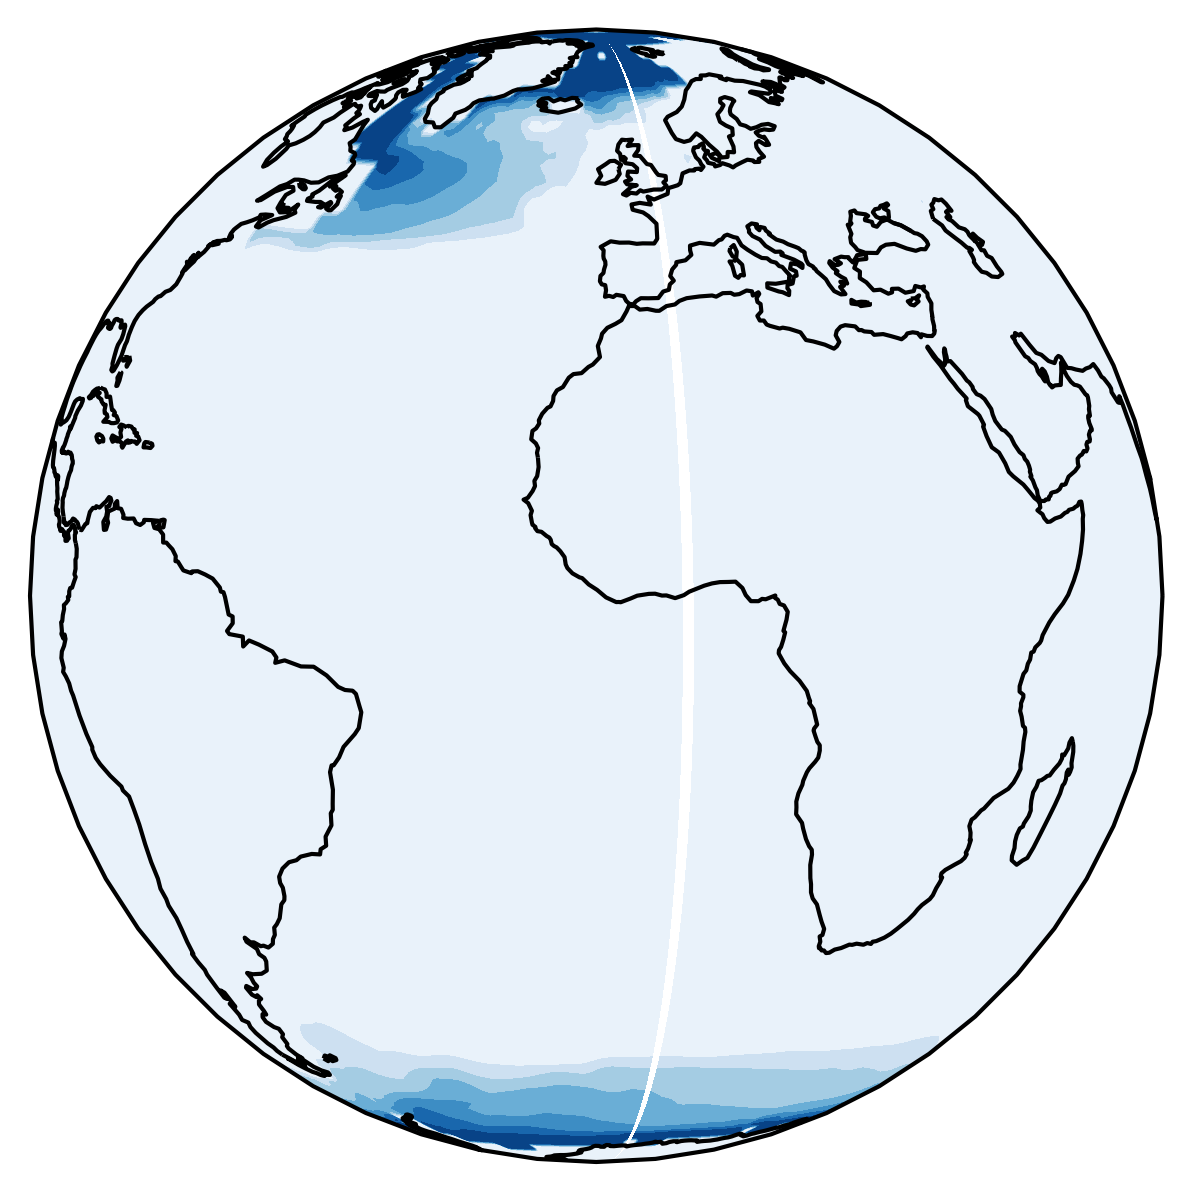

In [27]:
projection_map = ccrs.Orthographic(central_longitude=350.0, central_latitude=5.0, globe=None)

figMap = plt.figure(figsize=(5, 5), dpi=300)
axMap = figMap.add_subplot(1, 1, 1, projection=projection_map)

axMap.contourf(lon, lat, ice, transform=ccrs.PlateCarree(), cmap='Blues')
axMap.coastlines()
axMap.set_global()